# SyriaTel Customer Churn Prediction


# Problem Statement
The business problem at hand is the need to predict customer churn accurately. By identifying potential churners early on, SyriaTel can implement targeted strategies to retain customers, such as offering incentives, personalized promotions, or improved customer service. This proactive approach can significantly impact customer retention rates and, consequently, the overall financial health of the company.


# Business Understanding

The primary stakeholder for this project is SyriaTel, a telecommunications company. SyriaTel is interested in understanding and predicting customer churn, which refers to the phenomenon where customers discontinue their services with the company. This is a critical concern for SyriaTel, as retaining customers is crucial for sustaining revenue and ensuring long-term business success.

# Data Understanding

Classification is a suitable approach for this problem context due to the nature of the target variable, which is 'churn.' Churn is typically a binary outcome – a customer either churns (1) or does not churn (0). Therefore, the problem naturally fits into the framework of binary classification, where the goal is to categorize customers into two classes based on certain features.

The objective is to build a predictive model that can classify customers as potential churners or non-churners. This model will be trained on historical data, leveraging patterns and relationships between various customer-related features and the likelihood of churn. Classification algorithms, such as logistic regression, decision trees, or support vector machines, are well-suited for this task as they are designed to handle binary outcomes and can provide probability estimates for each class.

By employing classification techniques, SyriaTel can make informed and timely decisions to implement retention strategies, ultimately reducing customer churn and fostering long-term customer relationships. This predictive approach aligns with modern data-driven business practices, allowing SyriaTel to be proactive in addressing customer satisfaction and loyalty.

In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.feature_selection import RFE, RFECV

# Exploratory Data Analysis

In [45]:
# Load the dataset
df = pd.read_csv("SyriaTel.csv")

In [46]:
# Explore the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [47]:
df.groupby(['churn']).mean() 

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
churn,,,,,,,,,,,,,,,,
False,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
True,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


In [48]:
df.groupby(['churn']).describe() 

account length                                                        \
               count        mean       std  min   25%    50%    75%    max   
churn                                                                        
False         2850.0  100.793684  39.88235  1.0  73.0  100.0  127.0  243.0   
True           483.0  102.664596  39.46782  1.0  76.0  103.0  127.0  225.0   

      area code              ... total intl charge       \
          count        mean  ...               75%  max   
churn                        ...                          
False    2850.0  437.074737  ...              3.24  5.1   
True      483.0  437.817805  ...              3.46  5.4   

      customer service calls                                               
                       count      mean       std  min  25%  50%  75%  max  
churn                                                                      
False                 2850.0  1.449825  1.163883  0.0  1.0  1.0  2.0  8.0  
True                   483.0  2.229814  1.853275  0.0  1.0  2.0  4.0  9.0  

[2 rows x 128 columns]

In [49]:
# look for columns to with high number of unique values to consider for dropping
for value in df.columns:
    print(value, df[value].nunique(), len(df))

state 51 3333
account length 212 3333
area code 3 3333
phone number 3333 3333
international plan 2 3333
voice mail plan 2 3333
number vmail messages 46 3333
total day minutes 1667 3333
total day calls 119 3333
total day charge 1667 3333
total eve minutes 1611 3333
total eve calls 123 3333
total eve charge 1440 3333
total night minutes 1591 3333
total night calls 120 3333
total night charge 933 3333
total intl minutes 162 3333
total intl calls 21 3333
total intl charge 162 3333
customer service calls 10 3333
churn 2 3333


In [50]:
# Drop non-predictive columns
df = df.drop(['state', 'phone number'], axis=1)

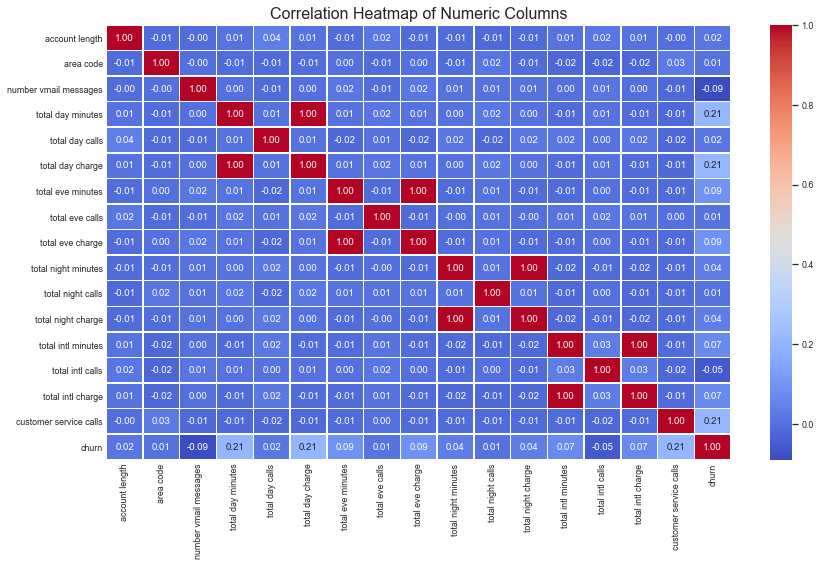

In [51]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set smaller font size for the heatmap
sns.set(font_scale=0.8)

# Create a heatmap using seaborn
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Adjust the tick_params for better visibility
heatmap.tick_params(axis='both', which='both', length=0)
heatmap.xaxis.set_tick_params(width=0.5)
heatmap.yaxis.set_tick_params(width=0.5)

plt.title('Correlation Heatmap of Numeric Columns', fontsize=16)
plt.show()

This shows perfect correlation between minutes and charge for four categories: total day charge/minutes, total night charge/minutes, total eve charge/minutes and total intl charge/minutes.
So we deop the four minutes columns.

In [52]:
df.columns.values

array(['account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'], dtype=object)

In [53]:
# Checking the data types of all the columns
df.dtypes

account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [54]:
# Convert categorical variables to numerical
label_encoder = LabelEncoder()
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

# Convert boolean churn column to 0 and 1
df['churn'] = df['churn'].astype(int)

In [55]:
# Checking the data types of all the columns
df.dtypes

account length              int64
area code                   int64
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int32
dtype: object

In [56]:
# Check for missing values
df.isnull().sum()

account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [57]:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [58]:
# Calculate the correlation matrix in relation to churn variable
correlation_matrix = df.corr()

# Extract correlations with the 'churn' column
churn_correlations = correlation_matrix['churn'].sort_values(ascending=False)

# Display the correlations
print(churn_correlations)

churn                     1.000000
international plan        0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64


International plan, customer service calls and total day charge seem to have the highest positive correlation with churn.

Total intl calls, number vmail messages and voicemail plan have the only negative correlation with churn.

# Scaling, splitting and training the data

In [59]:
# Assign 'churn' to y and drop it from the dataframe
X = df.drop('churn', axis=1)  
y = df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

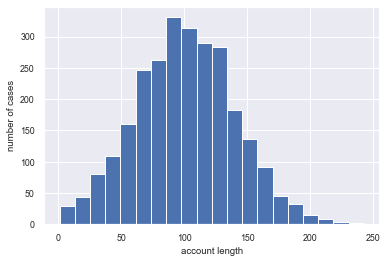

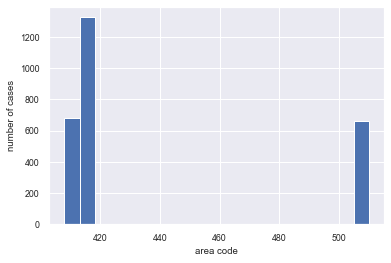

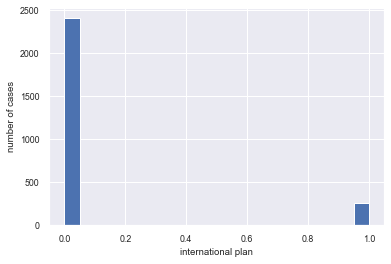

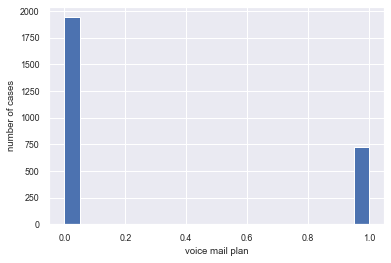

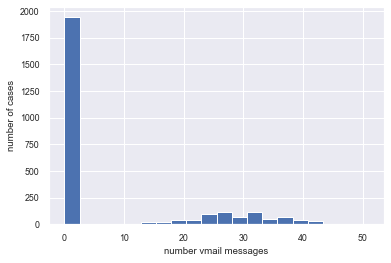

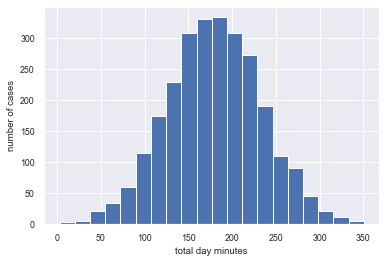

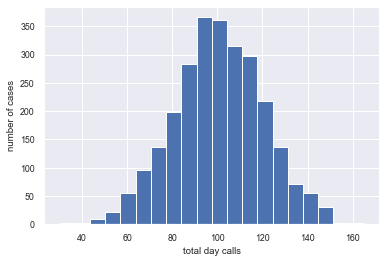

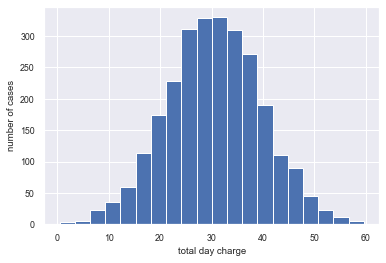

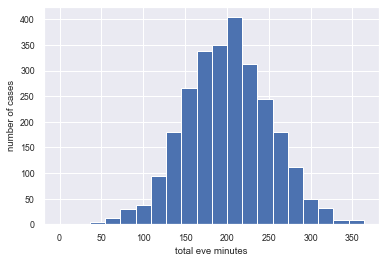

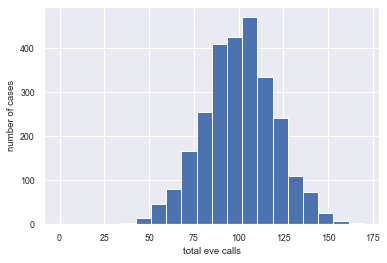

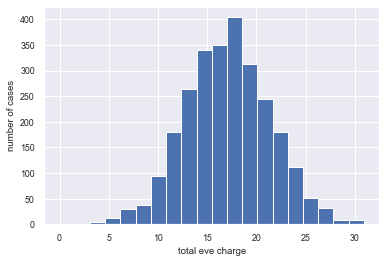

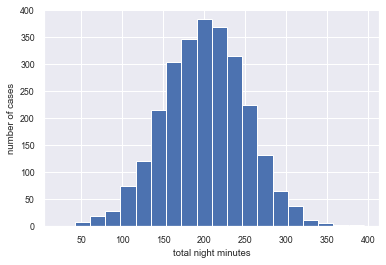

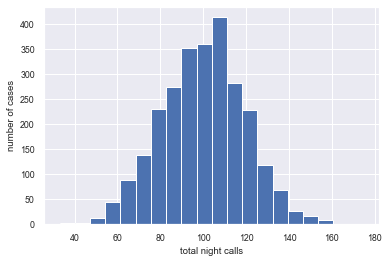

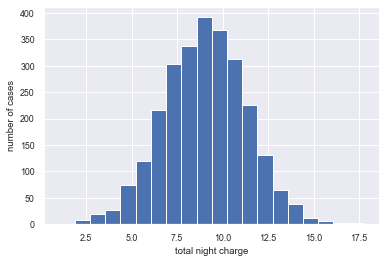

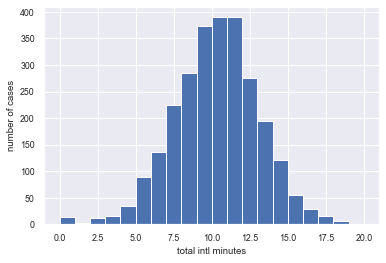

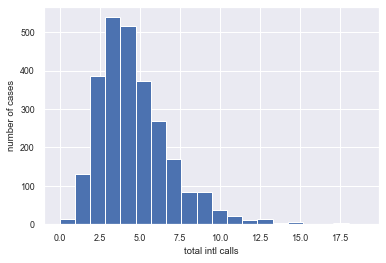

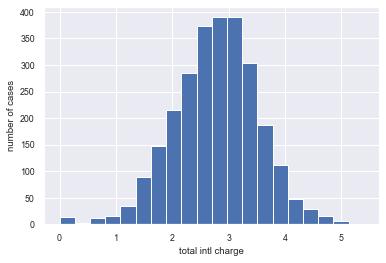

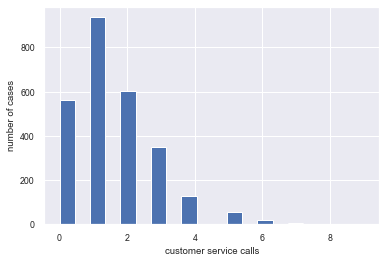

In [60]:
# Check the distribution curve for each feature
X.reset_index(drop=True, inplace=True)

for feat in X:    
    fig = X_train[feat].hist(bins=20)
    fig.set_ylabel('number of cases')
    fig.set_xlabel(feat)
    plt.show()

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_train_scaled_df.head()


,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,3.601382,1.735840,-0.326624,-0.611162,-0.584936,-1.547653,-0.429657,-1.547170,-0.729987,-1.840891,-0.731087,1.255804,0.925634,1.256197,-1.300791,0.634849,-1.304132,0.318978
1,0.184951,-0.517168,-0.326624,-0.611162,-0.584936,-1.244014,0.224176,-1.244071,-0.138082,0.499864,-0.139179,0.165090,-0.353704,0.164841,-2.194793,-0.184370,-2.191525,1.813519
2,-0.650176,-0.517168,3.061624,-0.611162,-0.584936,0.787609,-1.133785,0.787772,2.491952,0.549667,2.493068,0.147339,0.209205,0.147309,-0.549828,1.863677,-0.549186,-0.428293
3,1.020079,-0.517168,-0.326624,-0.611162,-0.584936,-0.969818,-0.127888,-0.970200,-0.408385,-1.890695,-0.408439,-1.178086,1.437368,-1.176344,-0.800149,-1.003589,-0.800835,-0.428293
4,-0.371801,1.735840,-0.326624,-0.611162,-0.584936,0.675354,-0.228477,0.675192,1.294330,-1.143645,1.295326,0.265680,0.516246,0.265649,-2.051753,-0.593980,-2.045833,-1.175564


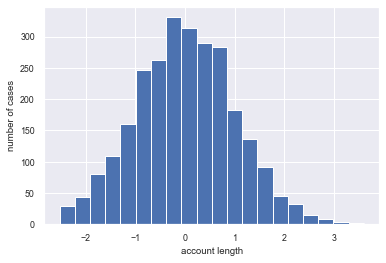

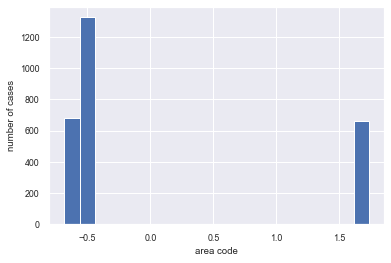

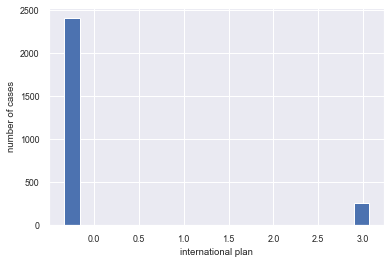

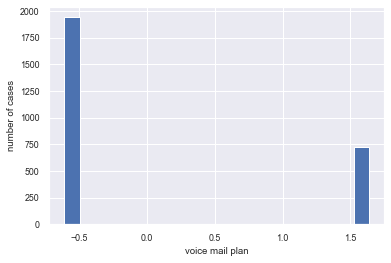

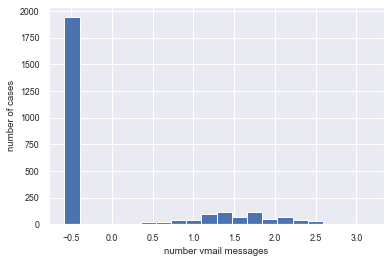

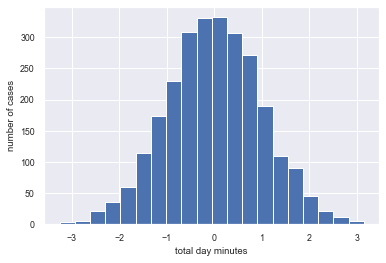

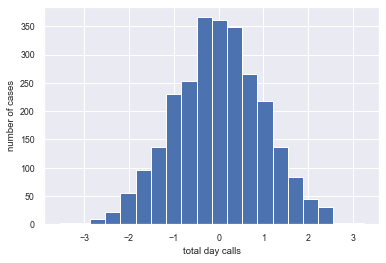

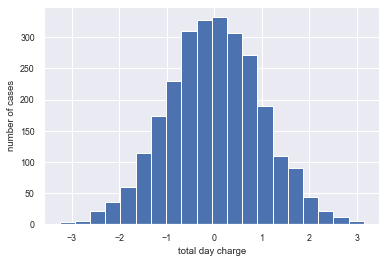

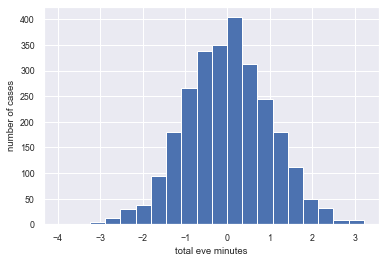

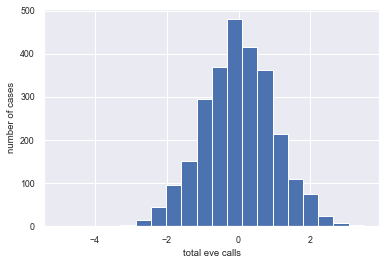

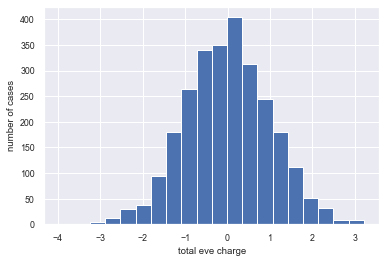

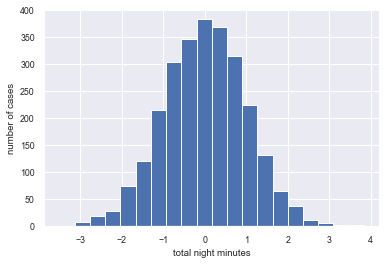

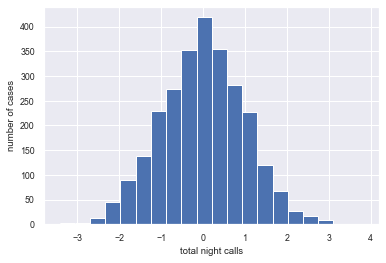

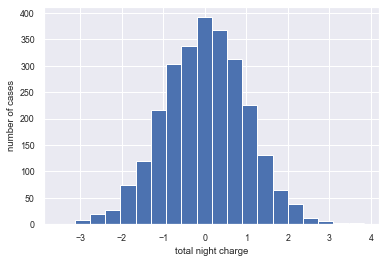

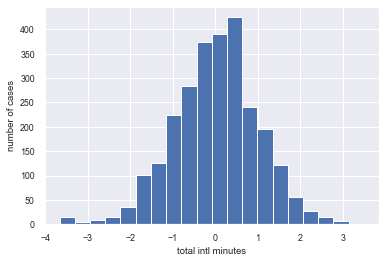

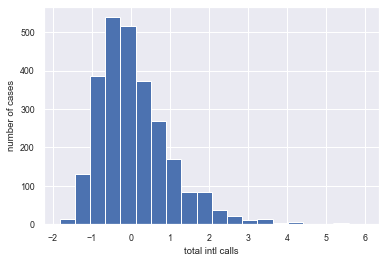

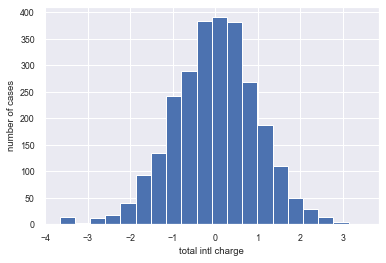

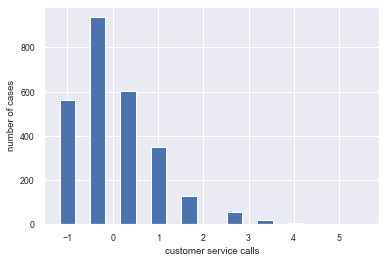

In [62]:
# Check the distribution curve for each feature

for feat in X:    
    fig = X_train_scaled_df[feat].hist(bins=20)
    fig.set_ylabel('number of cases')
    fig.set_xlabel(feat)
    plt.show()

Dealing with class imbalance by applying SMOTE oversampling

In [63]:
# Create an instance of the SMOTE oversampling technique with a specified random state
smote = SMOTE(random_state=0)

# Apply SMOTE oversampling to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## Building Models



# 1. Logistic Regression


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Accuracy: 0.6836581709145427
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.68      0.78       566
           1       0.28      0.71      0.41       101

    accuracy                           0.68       667
   macro avg       0.61      0.70      0.60       667
weighted avg       0.83      0.68      0.73       667



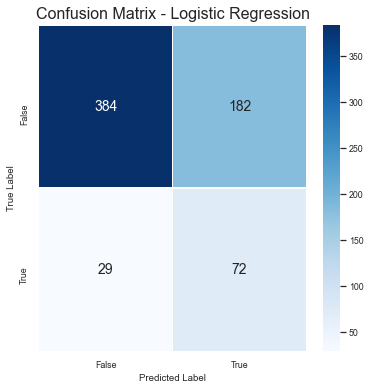

In [64]:
log_reg_model = LogisticRegression(random_state=0)
log_reg_model.fit(X_train_smote, y_train_smote)
y_pred_log_reg = log_reg_model.predict(X_test)

print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_log_reg)
class_labels = ["False", "True"]
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Set up the matplotlib figure
plt.figure(figsize=(6, 6))
plt.rcParams.update({'font.size': 14})  

# Create a heatmap using seaborn
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', linewidths=0.5)

plt.title('Confusion Matrix - Logistic Regression', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



# 2. Random Forest



Random Forest Metrics:
Accuracy: 0.9280359820089955
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       566
           1       0.77      0.75      0.76       101

    accuracy                           0.93       667
   macro avg       0.86      0.86      0.86       667
weighted avg       0.93      0.93      0.93       667



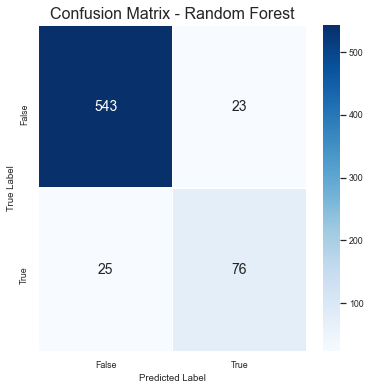

In [65]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
class_labels = ["False", "True"]
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Set up the matplotlib figure
plt.figure(figsize=(6, 6))
plt.rcParams.update({'font.size': 14}) 

# Create a heatmap using seaborn
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', linewidths=0.5)

plt.title('Confusion Matrix - Random Forest', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# 3. Support Vector Machine (SVM)


In [66]:
def find_best_k(X_train_smote, y_train_smote, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_smote, y_train_smote)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))
    
find_best_k(X_train_smote, y_train_smote, X_test, y_test)

Best Value for k: 15
F1-Score: 0.37940379403794033



Support Vector Machine Metrics:
Accuracy: 0.848575712143928
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       566
           1       0.50      0.54      0.52       101

    accuracy                           0.85       667
   macro avg       0.71      0.72      0.72       667
weighted avg       0.85      0.85      0.85       667



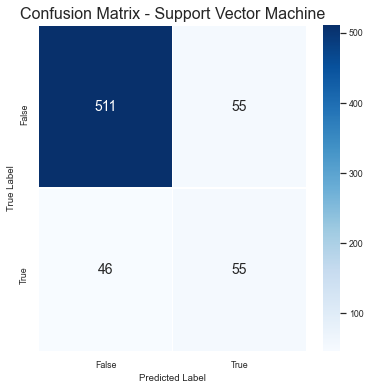

In [67]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_smote, y_train_smote)
y_pred_svm = svm_model.predict(X_test)

print("\nSupport Vector Machine Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
class_labels = ["False", "True"]
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Set up the matplotlib figure
plt.figure(figsize=(6, 6))
plt.rcParams.update({'font.size': 14})  

# Create a heatmap using seaborn
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', linewidths=0.5)

plt.title('Confusion Matrix - Support Vector Machine', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# 4. K-Nearest Neighbors (KNN)



K-Nearest Neighbors Metrics:
Accuracy: 0.671664167916042
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       566
           1       0.26      0.61      0.36       101

    accuracy                           0.67       667
   macro avg       0.58      0.65      0.57       667
weighted avg       0.81      0.67      0.72       667



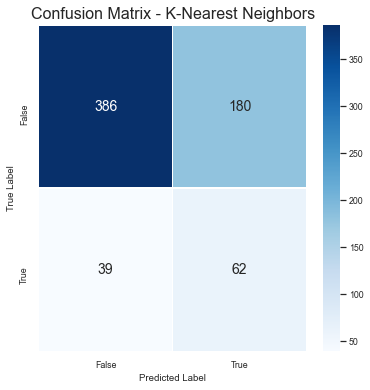

In [68]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_smote, y_train_smote)
y_pred_knn = knn_model.predict(X_test)

print("\nK-Nearest Neighbors Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
class_labels = ["False", "True"]
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Set up the matplotlib figure
plt.figure(figsize=(6, 6))
plt.rcParams.update({'font.size': 14})  

# Create a heatmap using seaborn
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', linewidths=0.5)

plt.title('Confusion Matrix - K-Nearest Neighbors', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# 5. Decision Tree



Decision Tree Metrics:
Accuracy: 0.8245877061469266
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       566
           1       0.45      0.77      0.57       101

    accuracy                           0.82       667
   macro avg       0.70      0.80      0.73       667
weighted avg       0.88      0.82      0.84       667



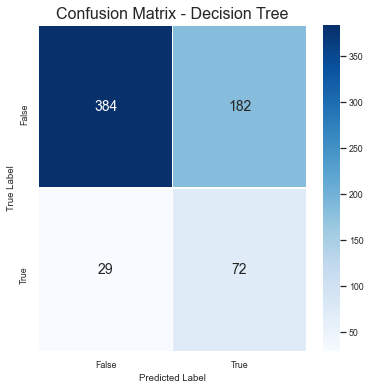

In [69]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)
y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_log_reg)
class_labels = ["False", "True"]
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Set up the matplotlib figure
plt.figure(figsize=(6, 6))
plt.rcParams.update({'font.size': 14})  

# Create a heatmap using seaborn
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', linewidths=0.5)

plt.title('Confusion Matrix - Decision Tree', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6. Gradient Boost


Gradient Boost Metrics:
Accuracy: 0.9220389805097451
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       566
           1       0.72      0.78      0.75       101

    accuracy                           0.92       667
   macro avg       0.84      0.86      0.85       667
weighted avg       0.92      0.92      0.92       667



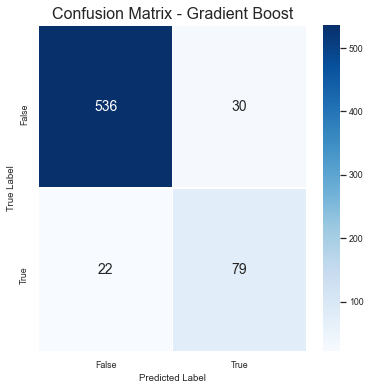

In [70]:
GB_model = GradientBoostingClassifier()
GB_model.fit(X_train_smote, y_train_smote)
y_pred_GB = GB_model.predict(X_test)

print("\nGradient Boost Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_GB)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_GB))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_GB)
class_labels = ["False", "True"]
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Set up the matplotlib figure
plt.figure(figsize=(6, 6))
plt.rcParams.update({'font.size': 14})  

# Create a heatmap using seaborn
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', linewidths=0.5)

plt.title('Confusion Matrix - Gradient Boost', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Evaluate Models


In [71]:
models = ['log_reg_model','Random Forest', 'svm_model', 'knn_model', 'dt_model','GB_model']
predictions = [y_pred_log_reg, y_pred_rf, y_pred_svm, y_pred_knn, y_pred_dt, y_pred_GB]
y_true = y_test

#  Confusion Matrix Comparison


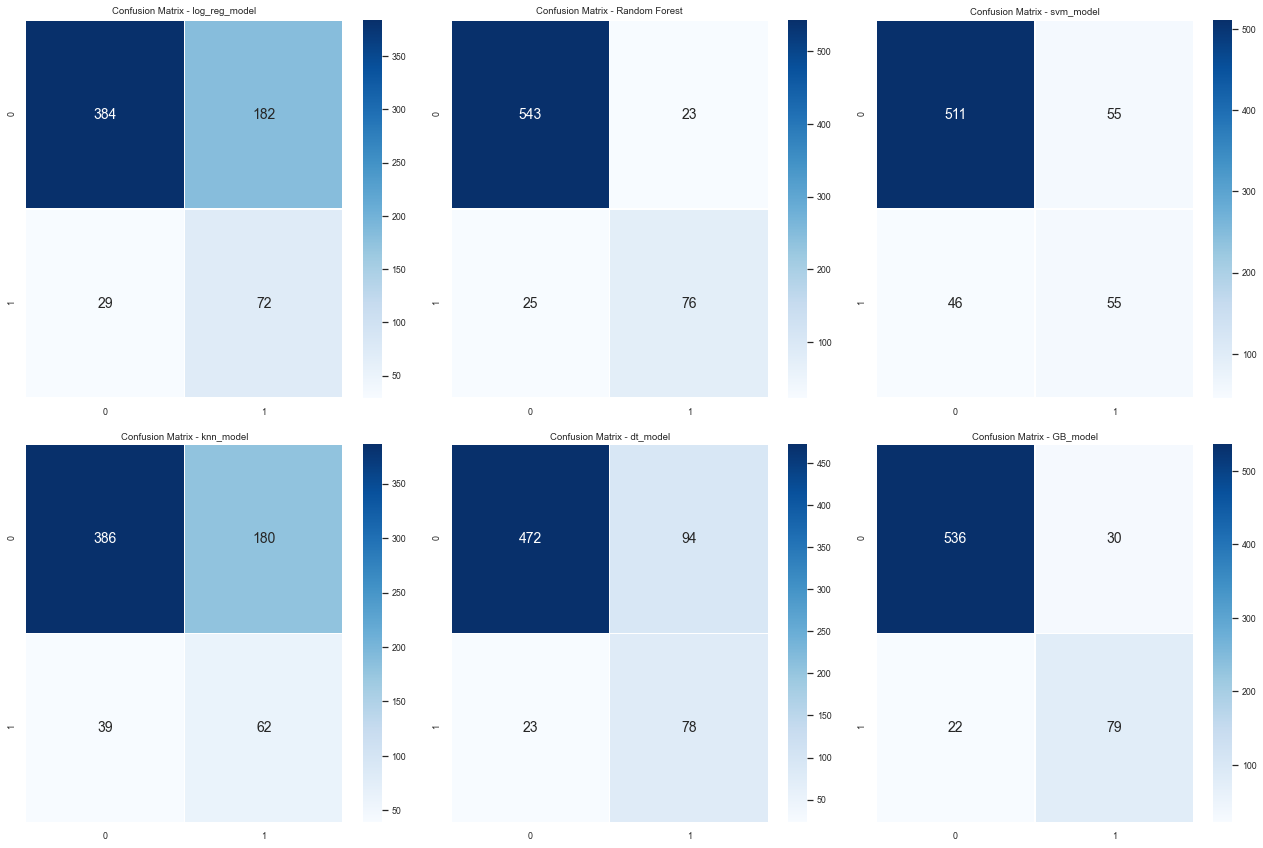

In [72]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Flatten the axes array for easier iteration
axes = axes.ravel()

for model_name, y_pred, ax in zip(models, predictions, axes):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create a DataFrame for the confusion matrix with labeled axes
    cm_df = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    
    # Create a heatmap using seaborn
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', linewidths=0.5, ax=ax)
    
    ax.set_title(f'Confusion Matrix - {model_name}')

plt.tight_layout()
plt.show()

# ROC Curve Comparison


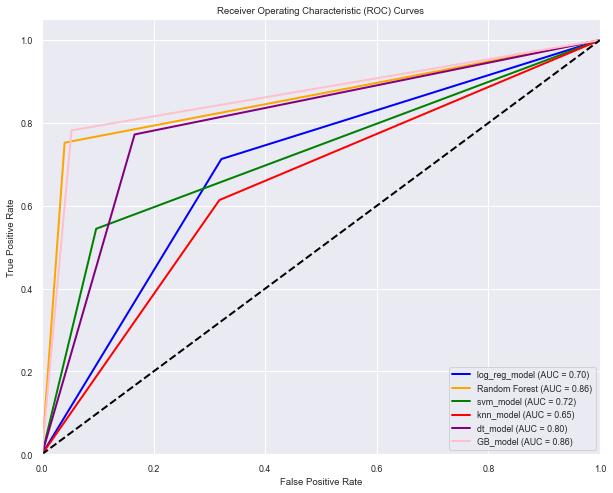

In [73]:
from sklearn.preprocessing import label_binarize
from itertools import cycle
# Binarize the true labels
y_true_bin = label_binarize(y_true, classes=[0, 1])

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Define colors for each model
colors = cycle(['blue', 'orange', 'green', 'red', 'purple', 'pink'])

# Plot ROC curves for each model
for i, (model, pred, color) in enumerate(zip(models, predictions, colors)):
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), pred.ravel())
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{model} (AUC = {roc_auc:.2f})')

# Plot the random classifier (diagonal)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)

# Set plot details
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

## Model Comparison - Accuracy


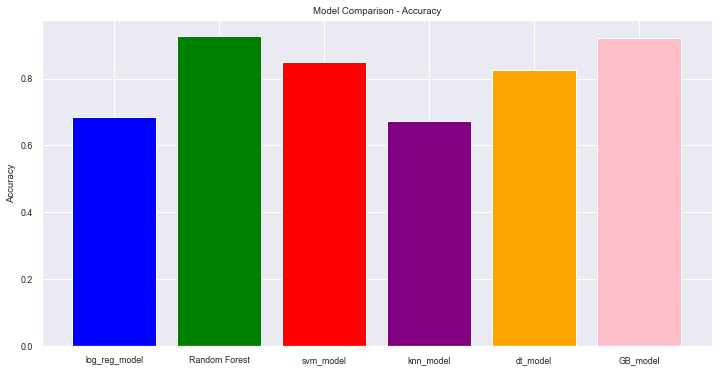

In [74]:
accuracies = [accuracy_score(y_test, pred) for pred in predictions]

plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'pink'])
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.show()

# Hyperparameter tuning on the Gradient Boosting model


By fine-tuning the hyperparameters of the Gradient Boosting algorithm, we can further optimize its performance and potentially achieve even better results.

In this case, the parameters being tuned are:

n_estimators - The number of trees in the Random Forest ensemble.

max_depth - The maximum depth of each tree in the ensemble.

min_samples_split - The minimum number of samples required to split an internal node.

min_samples_leaf - The minimum number of samples required to be at a leaf node.

The grid search aims to find the best combination of hyperparameters that maximizes the performance of the model based on the chosen evaluation metric.

In [75]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a GridSearchCV object with the defined parameter grid and scoring metric
grid_search = GridSearchCV(estimator=GB_model, param_grid=param_grid, scoring='recall', cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.9382673039272141



The best parameters found by the grid search are:

'max_depth': 10

'min_samples_leaf': 2

'min_samples_split': 5

'n_estimators': 150

The best score achieved by the grid search is 0.9374, which represents the evaluation metric used during the grid search.

We shall now fit the random forest classifier with the best parameters.

In [76]:
# Training the random forest classifier
GB_tuned = GradientBoostingClassifier(
                             n_estimators=150,
                             random_state=0,
                             max_depth=10,
                             min_samples_leaf=2,
                             min_samples_split=5)
GB_tuned.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
GB_tuned_train = GB_tuned.predict(X_train_smote)
GB_tuned_test = GB_tuned.predict(X_test)

In [77]:
# Classification report for training data
print("Classification Report for Training Data:")
print(classification_report(y_train_smote, GB_tuned_train))

# Classification report for test data
print("\nClassification Report for Test Data:")
print(classification_report(y_test, GB_tuned_test))

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2284
           1       1.00      1.00      1.00      2284

    accuracy                           1.00      4568
   macro avg       1.00      1.00      1.00      4568
weighted avg       1.00      1.00      1.00      4568


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       566
           1       0.81      0.78      0.80       101

    accuracy                           0.94       667
   macro avg       0.89      0.88      0.88       667
weighted avg       0.94      0.94      0.94       667




The model shows improvements in recall, which is crucial in identifying and retaining customers at risk of churning. It suggests that the model may be more suitable for customer churn prediction, as it can identify a higher proportion of churned customers while still maintaining a reasonable level of precision.

Additionally, unlike the random forest model fitted before fine-tuning, this tuned model does not overfit.

# False Positive - False Negative Trade-off

This process entails striking a balance or compromising between minimizing one type of error at the expense of increasing the other type of error.

Increasing the model's sensitivity (lowering the threshold for predicting churn) can reduce false negatives, thereby identifying more customers who are likely to churn. However, this may also increase the number of false positives, resulting in allocating resources to customers who are less likely to churn.

If the cost of false negatives (missing potential churners) is deemed higher, the model should prioritize minimizing false negatives, even if it leads to a higher number of false positives. Conversely, if the cost of false positives (allocating resources to non-churners) is considered higher, the model should focus on reducing false positives, even if it results in missing some churners.

Accuracy: 0.9370314842578711
Precision: 0.7920792079207921
Recall: 0.7920792079207921
F1 Score: 0.7920792079207921
False Positive Rate: 0.037102473498233215
False Negative Rate: 0.2079207920792079


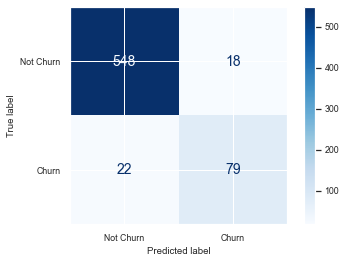

In [78]:
# Predict class probabilities
y_probs = GB_tuned.predict_proba(X_test)

# Set the threshold for positive class prediction
threshold = 0.4 
y_pred = (y_probs[:, 1] >= threshold).astype(int)

# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plot_confusion_matrix(GB_tuned, X_test, y_test, display_labels=['Not Churn', 'Churn'], cmap='Blues', values_format='d')

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
tn, fp, fn, tp = cm.ravel()
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print("False Positive Rate:", fpr)
print("False Negative Rate:", fnr)

plt.show()


By modifying the threshold from the default value of 0.5 to 0.4, we intentionally increase the sensitivity or recall of the model (the probability of classifying instances as positive). This means the model becomes more likely to correctly identify customers who are likely to churn (positive class) and reduces false negatives cases where the model fails to identify customers who actually churned.

As a result, the model's recall improved to 0.792, indicating a reduced likelihood of incorrectly identifying churned customers. This adjustment aligns with our business objective, as it reduces the risk of losing customers who were mistakenly classified as non-churned.

## Conclusion


In conclusion, both the Random Forest model and the Gradient Boost model show good performance in predicting customer churn. However, the Random Forest model has a slightly lower testing accuracy and precision compared to the other model. This suggests that the GB model may have a better balance between false positive and false negative predictions.

The trade-off between identifying as many churn cases as possible (high recall) and minimizing false positive predictions (high precision) is necessary for our analysis as it improves the predictive performance of our model and serves the objective of our stakeholder.

Our model can correctly make predictions for approximately 93.7% of the customers, indicating that the model's predictions were accurate for the majority of the customers. Out of all the customers predicted as churned, approximately 69.44% of them actually churned, indicating that when the model identified a customer as churned, it was correct around 69.44% of the time. Our model successfully captured about 86.96% of the customers who truly churned. The F1 score of 79.2% indicates that our model achieved a balanced trade-off between correctly identifying churned customers and minimizing false predictions.

The features that contribute the most to whether a customer churns or not include 'customer service calls', 'total day charge', 'total day minutes', 'total international calls', and 'total eve minutes'.

# Recommendations

Assess the Pricing Structure: Syria Tel should consider examining charges and researching methods for optimizing pricing plans or introducing flexible pricing options to satisfy the different needs of customers. 

Targeted Retaining Strategies: According to the model's projections, the organization should focus on customers who are more likely to churn. Identifying these clients ahead of time allows the organization to interact with them proactively, offering specific rewards, discounts, or upgraded services to encourage continuous loyalty. 

Customer Sectioning: Syria Tel should separate its customers depending on their churn propensity, allowing it to better customize its marketing and retention efforts. 

# Next steps

Improving False Negative Predictions: While the recall score suggests that our model identified a considerable proportion of churned consumers, there is still space for improvement in reducing false negative predictions. It is critical to identify these consumers in order to adopt proactive retention efforts and reduce turnover. 

 Continuous tracking and evaluation: Regular model review and iteration are required to improve model performance. 